In [4]:
import json
import findfile
import pandas as pd
import data_utils

In [5]:
category_map = {
    'gameplay': ['gameplay', 'game mode', 'story', 'level design',
                 'multiplayer', 'violence', 'character design',
                 'controls', 'tutorial', 'quality', 'gun play', 'gunplay', 'environment', 'gameplay mechanics',
                 'world',
                 'game environment', 'game design', 'difficulty', 'content', 'cosmetic content', 'in-game content',
                 'options', 'user interface', 'UI', 'interface', 'gameplay', 'game modes', 'gameplay features',
                 'monetization'],
    'price': ['price'],
    'audio_visuals': ['audio_visuals', 'visuals', 'sounds', 'game environment', 'game design', 'visual', 'sound',
                      'audio_visuals', 'graphics', 'music', 'soundtrack', 'sound effects', 'audio'],
    'performance_bugs': ['performance_bugs', 'bugs', 'performance', 'saves', 'developers', 'updates', 'anticheat',
                         'update', 'patch', 'bug', 'crash', 'lag', 'performance', 'server', 'servers',
                         'server issues', 'server performance'],
    'community': ['languages', 'reviews', 'community', 'comparison'],
    'overall': ['overall', 'genre', 'platform', 'game', 'game#overall'],
    'NULL': ['NULL', 'none', None, 'null', '', 'noterm']
}


def categorize(term):
    for category, terms in category_map.items():
        if term in terms:
            return category
    return 'other'


def create_summary_template():
    summary_template = {}
    summary_template['total'] = 0

    summary_template['positive'] = 0
    summary_template['negative'] = 0
    summary_template['neutral'] = 0

    summary_template['gameplay'] = 0
    summary_template['price'] = 0
    summary_template['audio_visuals'] = 0
    summary_template['performance_bugs'] = 0
    summary_template['community'] = 0
    summary_template['overall'] = 0
    summary_template['NULL'] = 0
    summary_template['other'] = 0

    summary_template['terms'] = {}
    summary_template['terms']['gameplay'] = []
    summary_template['terms']['price'] = []
    summary_template['terms']['audio_visuals'] = []
    summary_template['terms']['performance_bugs'] = []
    summary_template['terms']['community'] = []
    summary_template['terms']['overall'] = []
    summary_template['terms']['NULL'] = []
    summary_template['terms']['other'] = []

    summary_template['terms']['neutral'] = []
    summary_template['terms']['positive'] = []
    summary_template['terms']['negative'] = []

    summary_template['opinions'] = {}
    summary_template['opinions']['gameplay'] = []
    summary_template['opinions']['price'] = []
    summary_template['opinions']['audio_visuals'] = []
    summary_template['opinions']['performance_bugs'] = []
    summary_template['opinions']['community'] = []
    summary_template['opinions']['overall'] = []
    summary_template['opinions']['NULL'] = []
    summary_template['opinions']['other'] = []

    summary_template['opinions']['neutral'] = []
    summary_template['opinions']['positive'] = []
    summary_template['opinions']['negative'] = []

    return summary_template


def do_summary(data):
    summary = create_summary_template()
    summary['total'] = len(data)
    for d in data:
        quads = d['Quadruples']
        for q in quads:
            aspect, category, opinion, polarity = q.get('aspect'), q.get('category'), q.get('opinion'), q.get(
                'polarity')
            category = categorize(category)

            try:
                summary[polarity] += 1
            except:
                print(polarity)
                print(q)
                polarity = 'neutral'
            try:
                summary[category] += 1
            except:
                print(category)
                print(q)
                category = 'NULL'

            if aspect != 'NULL':
                summary['terms'][polarity].append(aspect)
                summary['terms'][category].append(aspect)

            if opinion != 'NULL':
                summary['opinions'][polarity].append(opinion)
                summary['opinions'][category].append(opinion)

    return summary




In [6]:
data = {}
output_files = findfile.find_files('checkpoints', 'multitask', 'joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model',
                                   'output')
output_files = [f for f in output_files if f.endswith('.jsonl')]

for file in output_files:
    print("processing file: ", file, " ...")
    with open(file, 'r', encoding='utf8') as f:
        data[file] = {}
        data[file]['data'] = json.load(f)
        data[file]['summary'] = do_summary(data[file]['data'])

#transform data dictionary with text and quadruples to a dataframe
for file, d in data.items():
    quadruples = d['data']
    for sample in d['data']:
        df = pd.DataFrame.from_dict(sample, orient='index').T
        print(df.sample(1))


processing file:  checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl  ...
processing file:  checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_730_czech.txt.output.jsonl  ...
cant wait for
{'aspect': 'cs', 'category': 'go2', 'opinion': 'performance_bugs', 'polarity': 'cant wait for'}

{'aspect': 'NULL', 'category': 'gameplay', 'opinion': 'NULL', 'polarity': ''}
processing file:  checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_668580_czech.txt.output.jsonl  ...
Eternal
{'aspect': 'FPS game', 'category': 'gameplay', 'opinion': 'best AAA FPS game since Doom', 'polarity': 'Eternal'}
hinder you progres in game
{'aspect': 'NULL', 'category': 'performance_bugs', 'opinion': 'bugs', 'polarity': 'hinder you progres in game'}
processing file:  checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\app

TypeError: string indices must be integers

In [7]:
for file, d in data.items():
    print(file)
    print(d['summary'])
    print()

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl
{'total': 53, 'positive': 122, 'negative': 58, 'neutral': 2, 'gameplay': 67, 'price': 0, 'audio_visuals': 13, 'performance_bugs': 16, 'community': 8, 'overall': 78, 'NULL': 2, 'other': 0, 'terms': {'gameplay': ['MAD story', 'weapon design', 'stav', 'puzzle prvky', 'pribeh', 'lokality', 'opera', 'Bioshocku', 'Wolfensteina', 'příběh', 'postavy', 'postavy', 'atmosféra', 'Steelrisingu', 'Steelrisingu', 'Geoffrey Day', 'mix Prey, Fallout a Bioshocku', 'mapou', 'level designem', 'humorem', 'action', 'animations of enemies and bosses', 'bioshock/cyberpunk game', 'bots', 'gameplay', 'gameplay', 'příběh', 'vylepšenia zbraní', 'AAA FPS game', 'attempts of humor', 'robotic fridges', 'FPS', 'assety', 'fridge', 'tencles', 'HL2', 'Fallout mix', 'prostredie', 'herné mechanizmy', 'příbeh', 'open world', 'mapě', 'zbraně', 'Bossové', 'de.lita', 'příběh', 'scény', 'kombat', 'roboti', 

KeyError: 'summary'

In [8]:
from matplotlib import pyplot as plt
import numpy as np

2023-04-22 13:04:09,544 - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-04-22 13:04:09,545 - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-04-22 13:04:09,549 - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-04-22 13:04:09,550 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-22 13:04:09,550 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-22 13:04:09,550 - DEBUG: findfont: score(FontEnt

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl


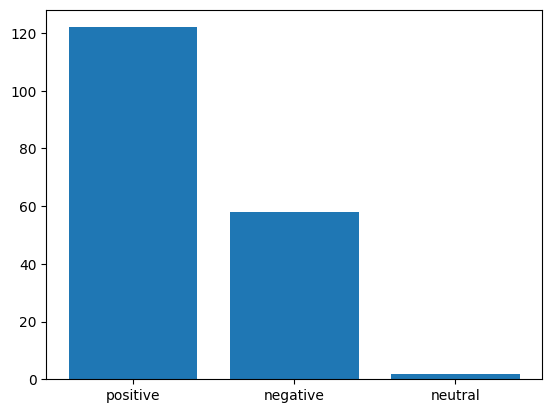

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_730_czech.txt.output.jsonl


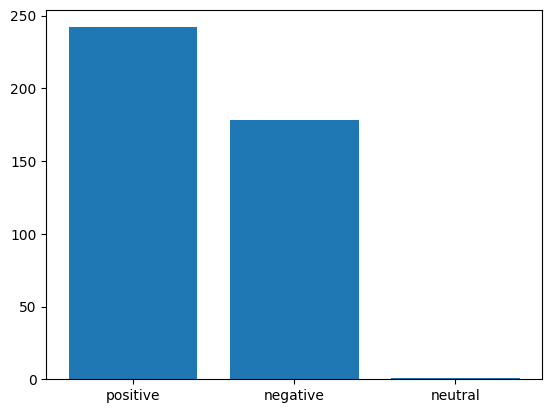

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_668580_czech.txt.output.jsonl


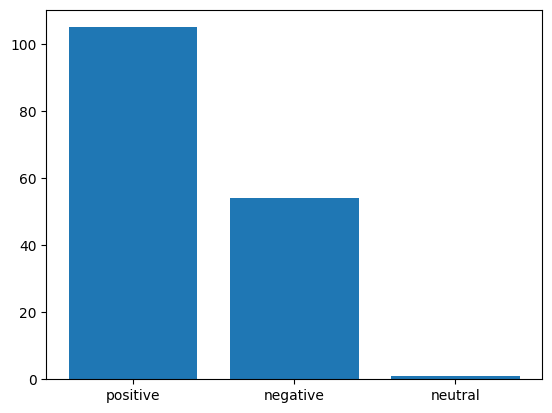

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_730_czech.txt.output.jsonl


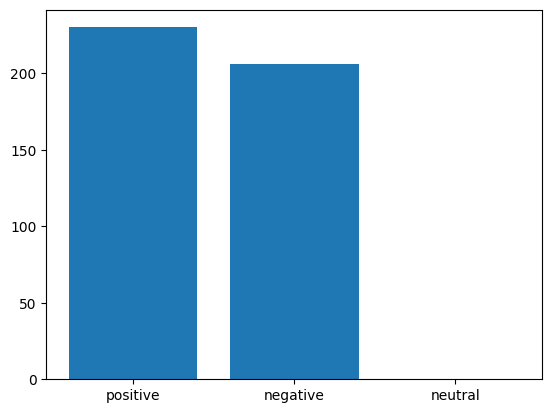

checkpoints\multitask\joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\checkpoint-1242\eval\FPS_generated_data.main_categories.joint-acos.eval.jsonl


KeyError: 'summary'

In [9]:
# bar plot of the number of positive, negative and neutral reviews
for file, d in data.items():
    print(file)
    summary = d['summary']
    plt.bar(['positive', 'negative', 'neutral'], [summary['positive'], summary['negative'], summary['neutral']])
    plt.show()

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl


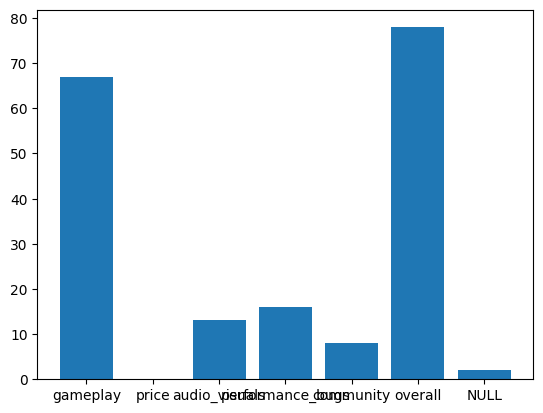

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_730_czech.txt.output.jsonl


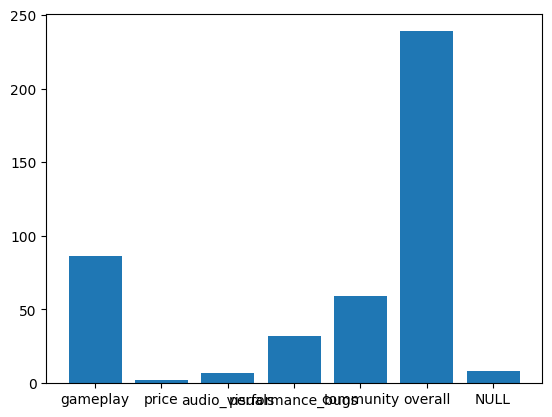

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_668580_czech.txt.output.jsonl


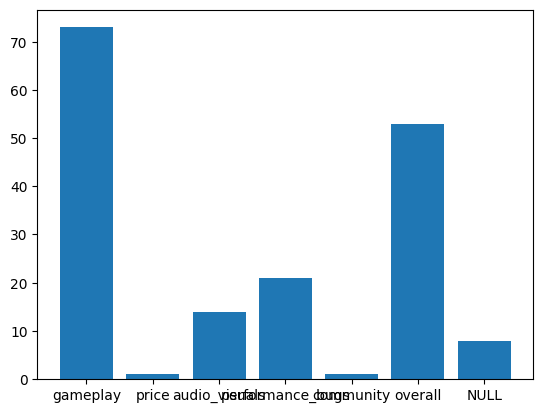

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_730_czech.txt.output.jsonl


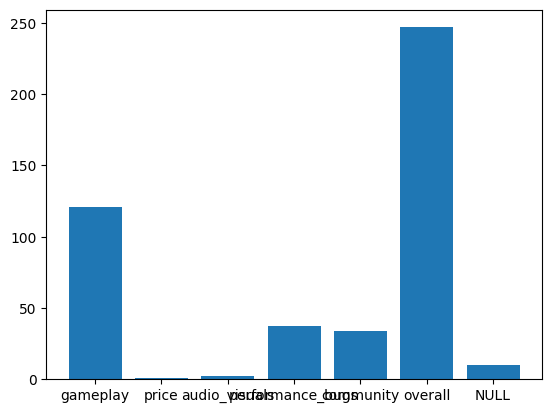

checkpoints\multitask\joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\checkpoint-1242\eval\FPS_generated_data.main_categories.joint-acos.eval.jsonl


KeyError: 'summary'

In [10]:
# bar plot of the number of reviews per category
for file, d in data.items():
    print(file)
    summary = d['summary']
    plt.bar(['gameplay', 'price', 'audio_visuals', 'performance_bugs', 'community', 'overall', 'NULL'],
            [summary['gameplay'], summary['price'], summary['audio_visuals'], summary['performance_bugs'],
             summary['community'], summary['overall'], summary['NULL']])
    plt.show()

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl
gameplay


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAna

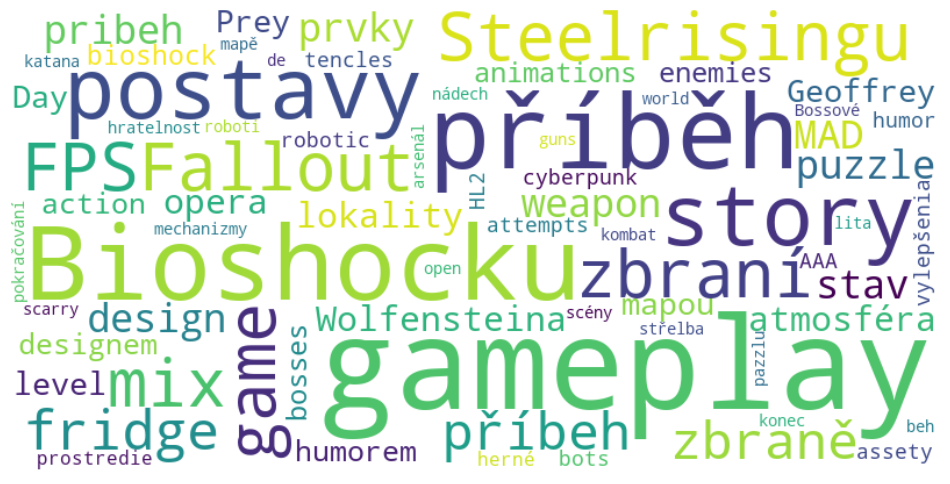

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


audio_visuals


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

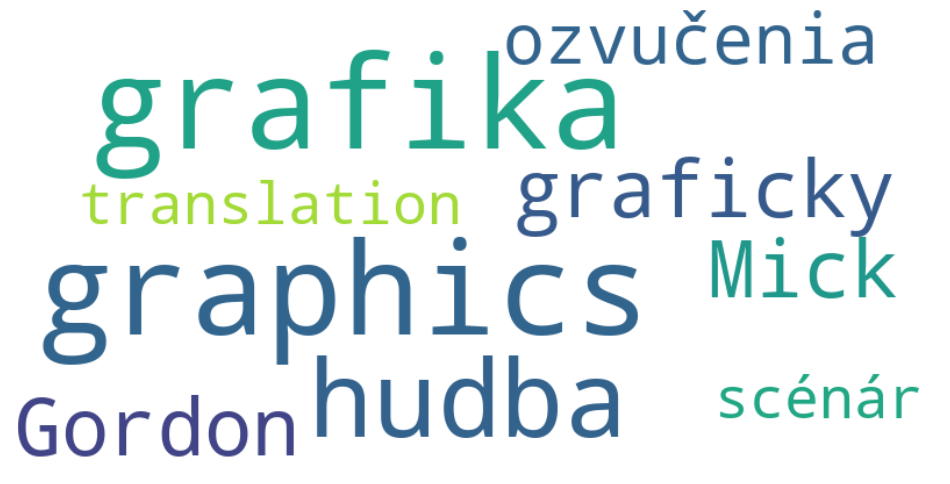

performance_bugs


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

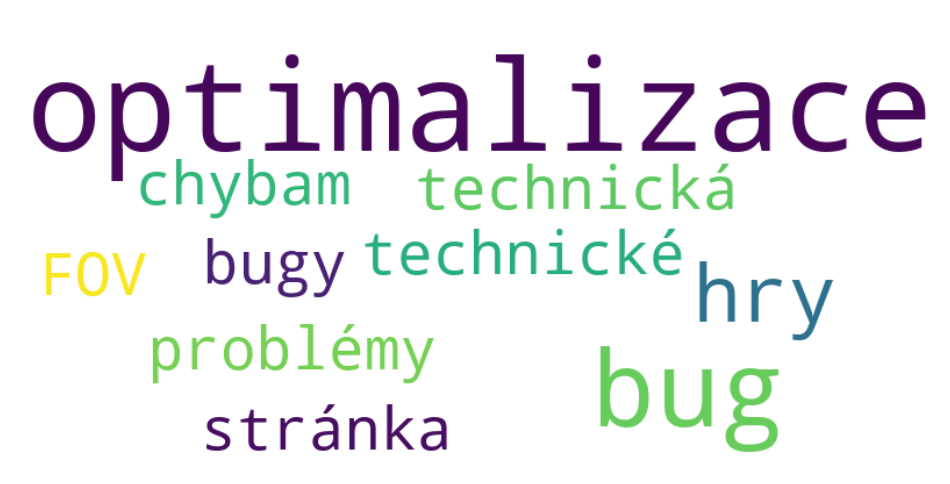

community


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

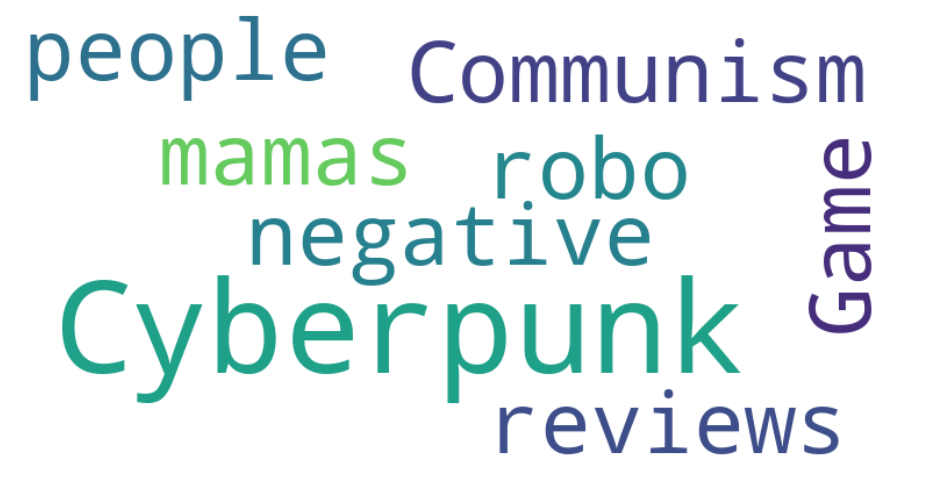

neutral


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


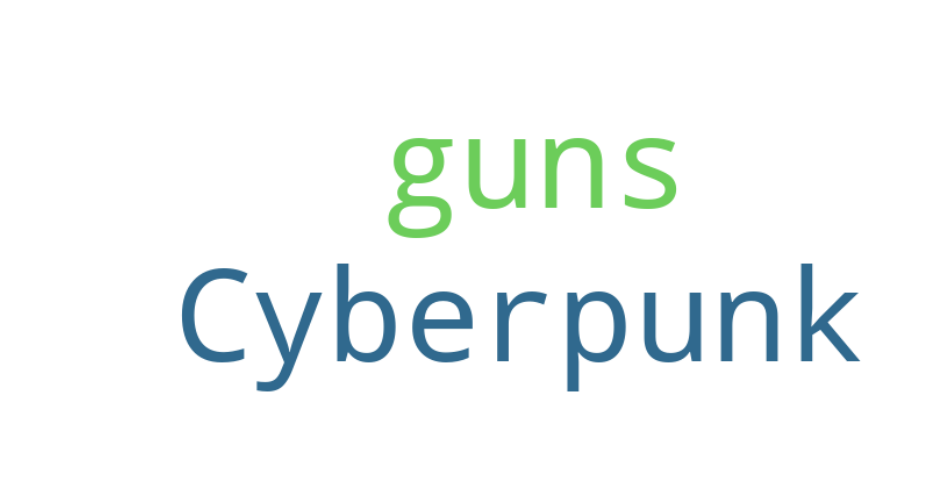

positive


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

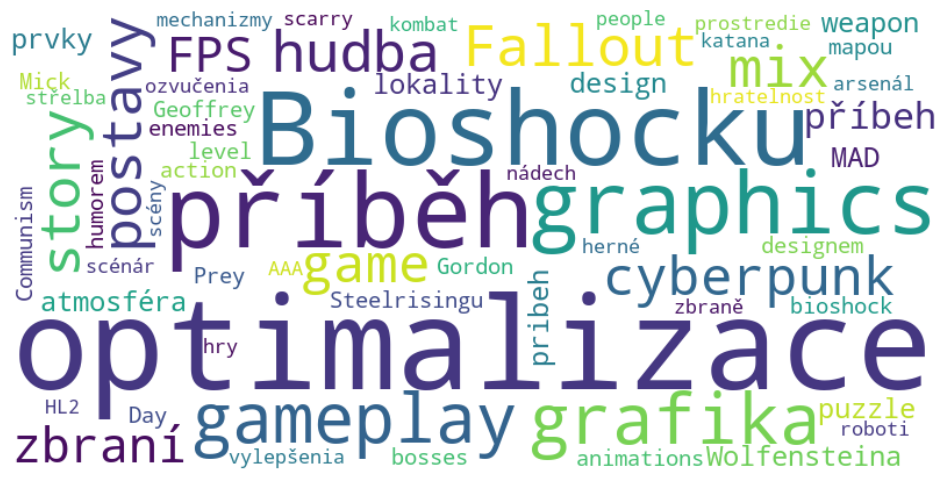

negative


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

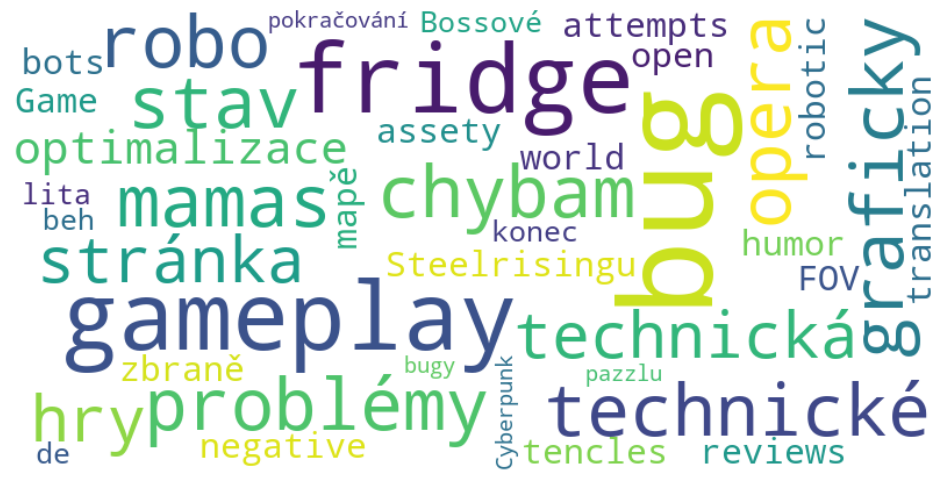

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_730_czech.txt.output.jsonl
gameplay


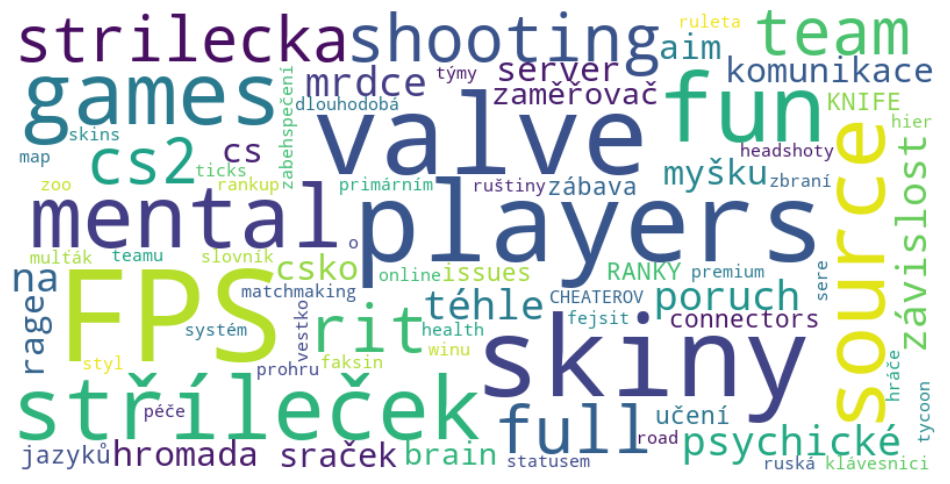

audio_visuals


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

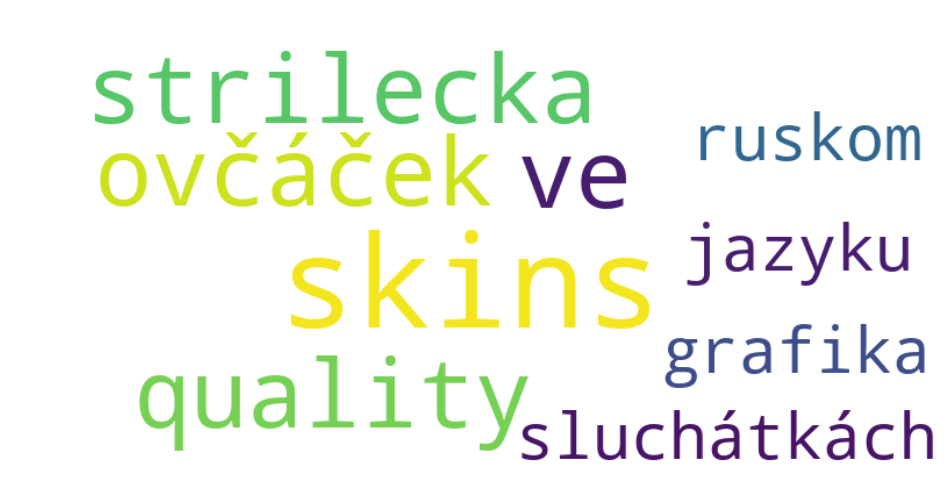

performance_bugs


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

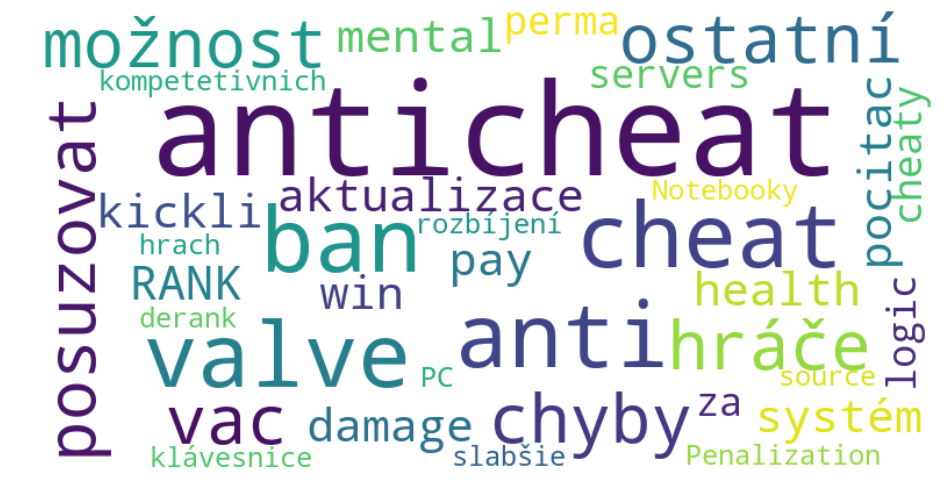

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


community


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

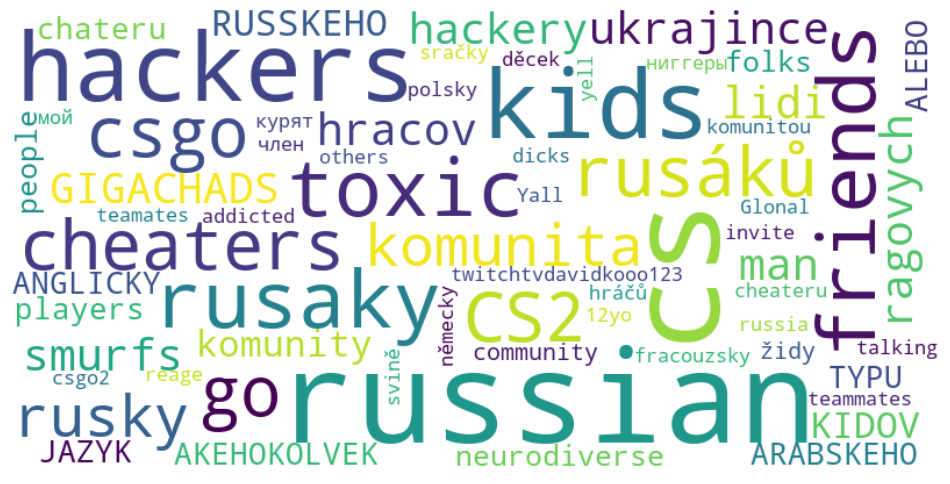

NULL


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


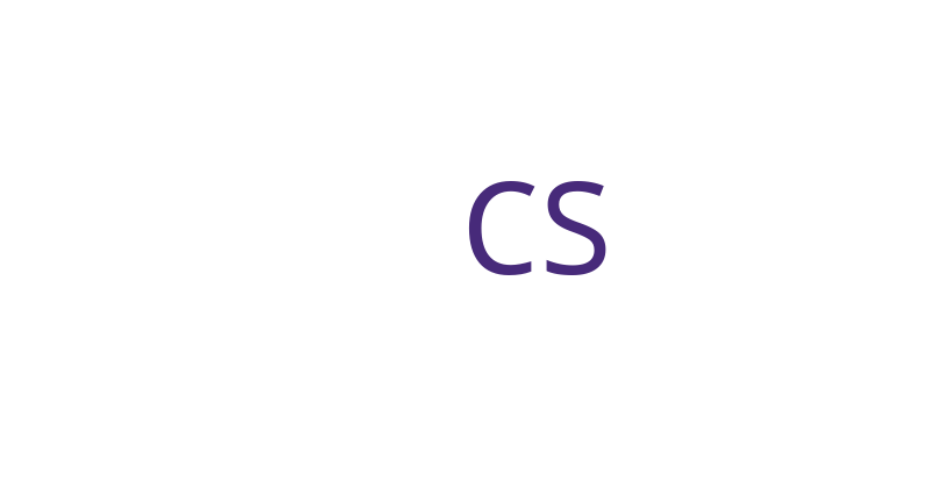

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

neutral


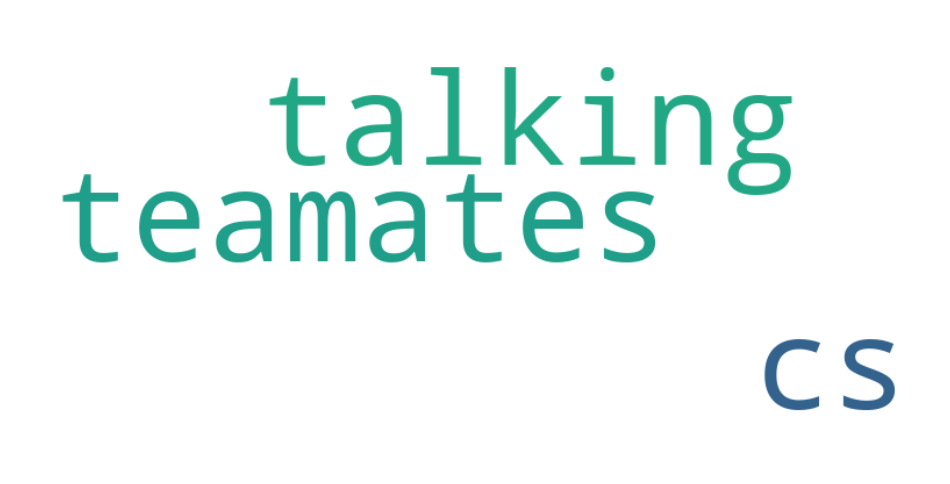

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

positive


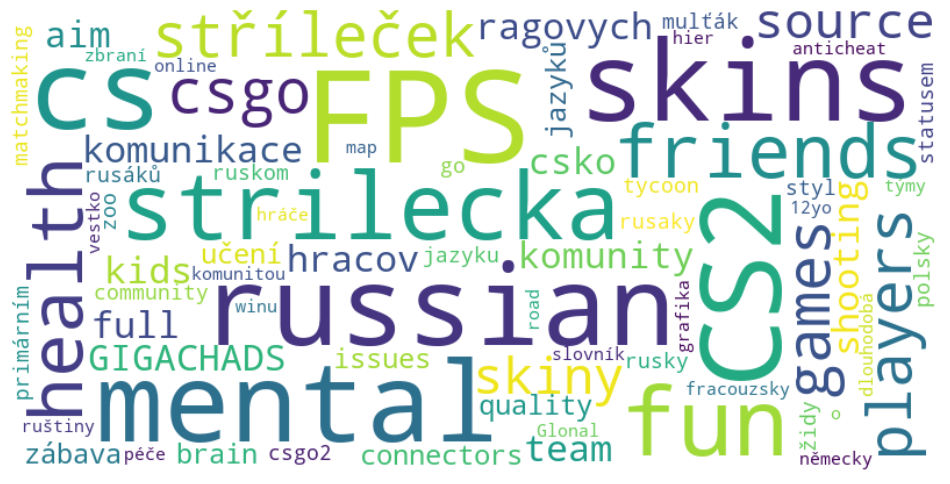

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

negative


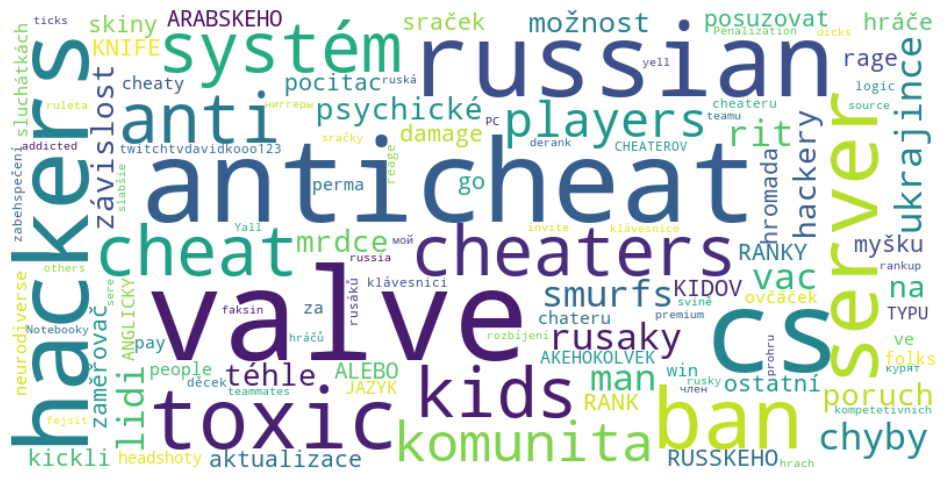

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_668580_czech.txt.output.jsonl
gameplay


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

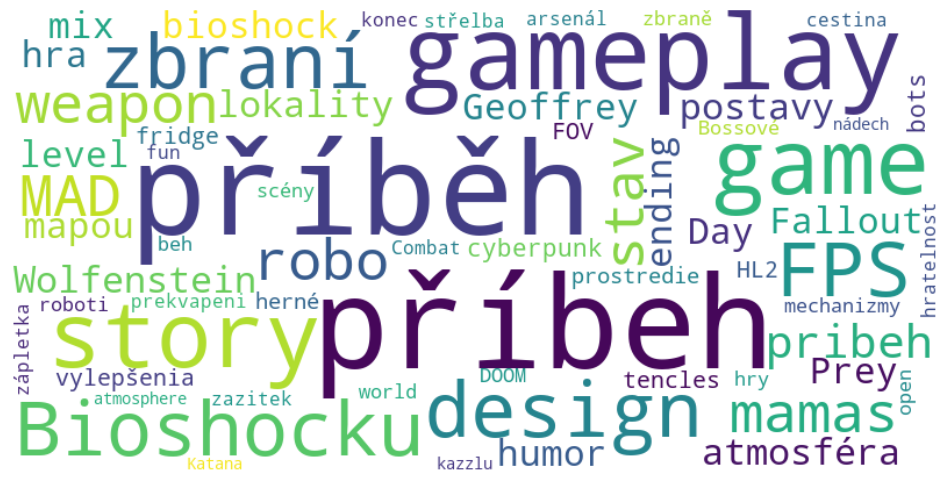

audio_visuals


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

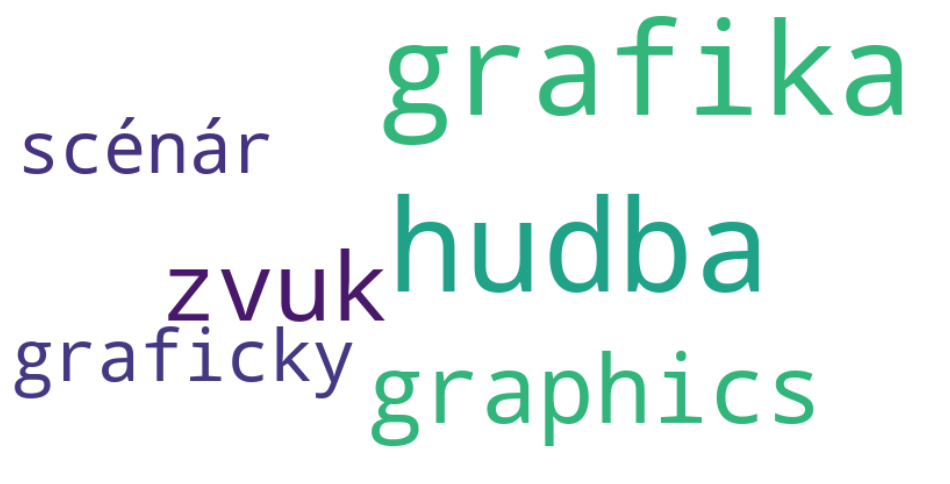

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

performance_bugs


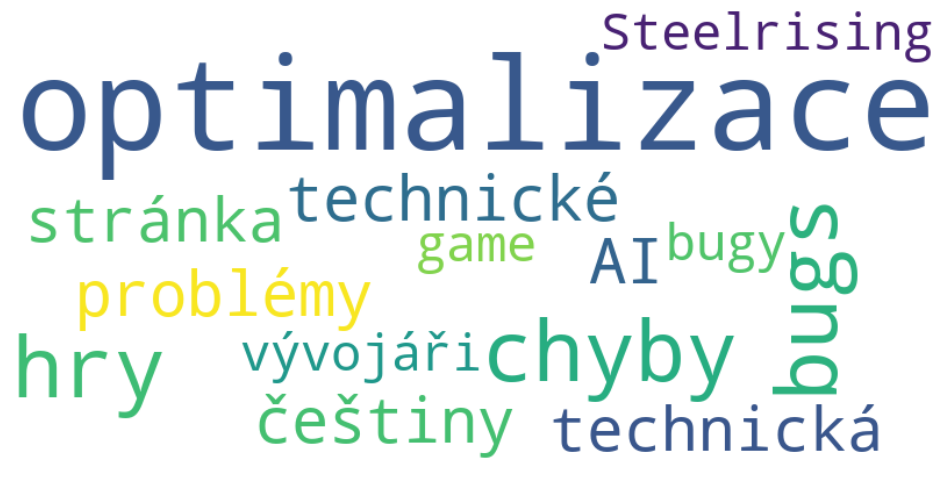

community


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


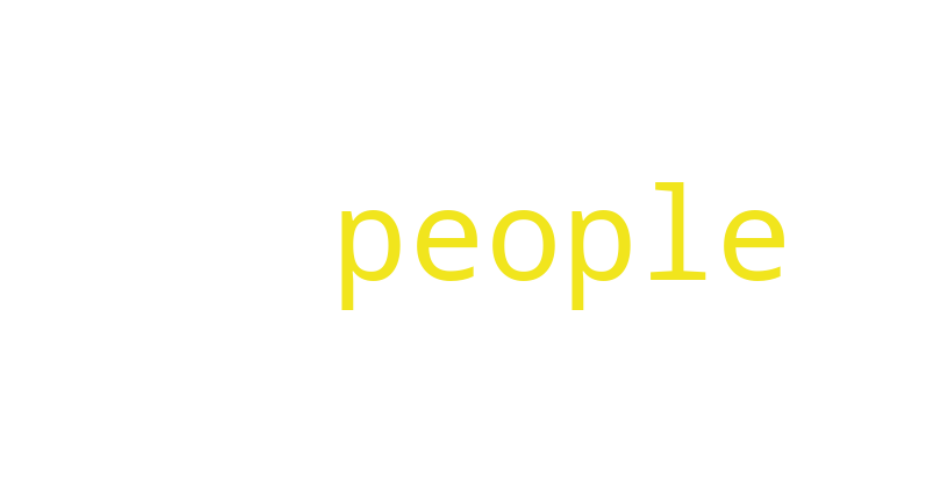

overall


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


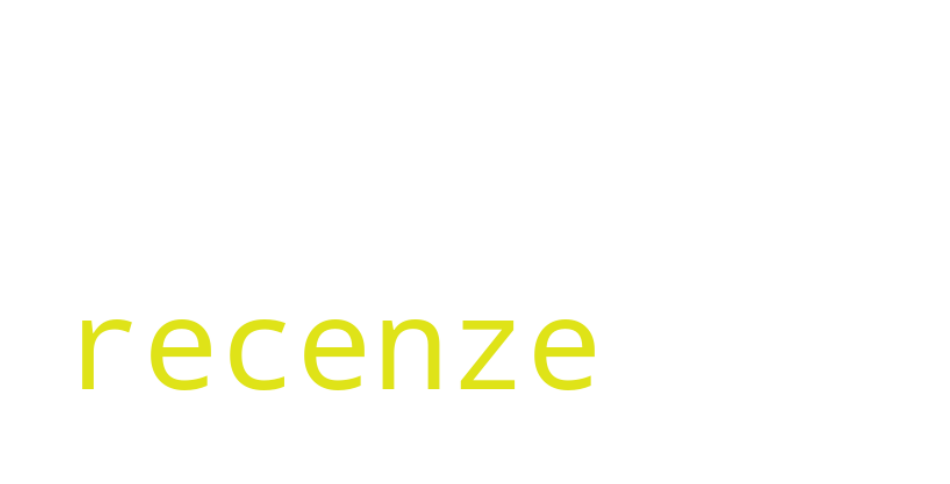

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

NULL


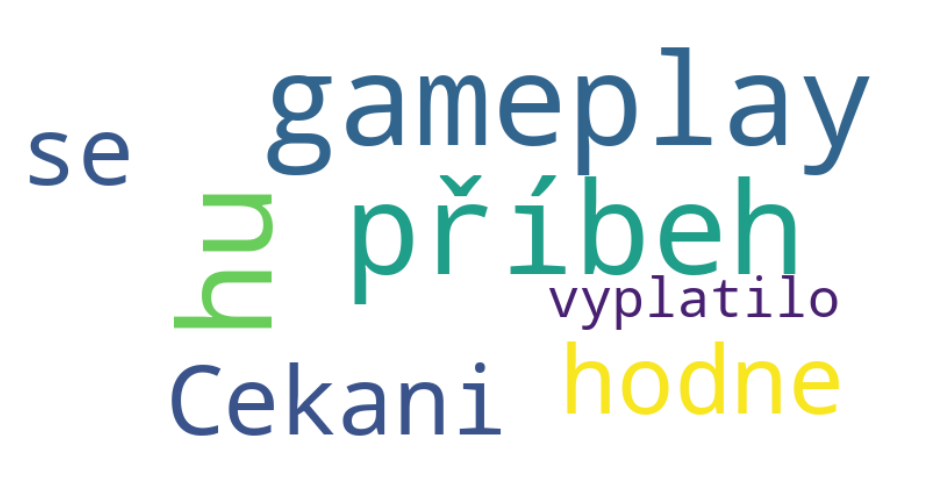

neutral


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


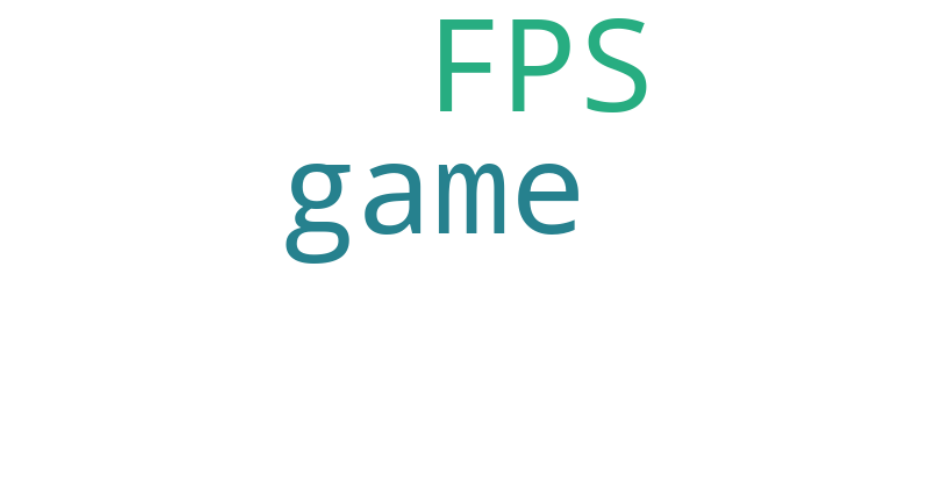

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

positive


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

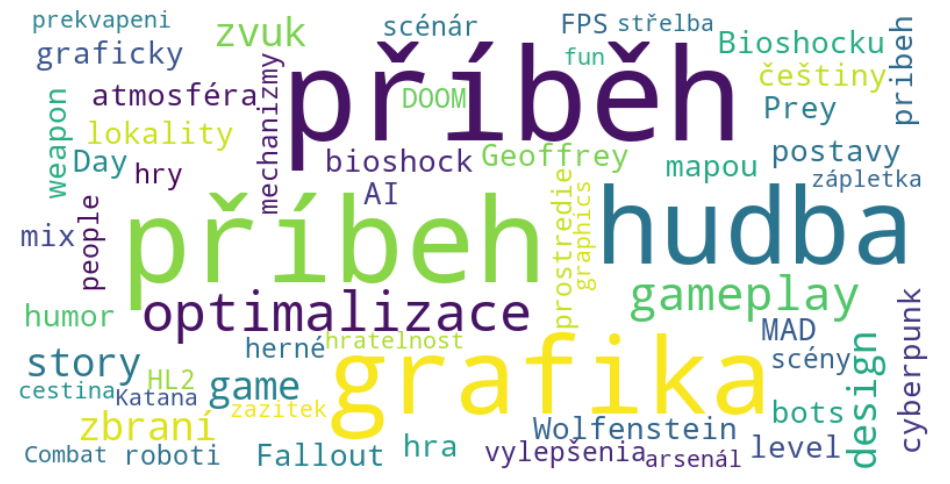

negative


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

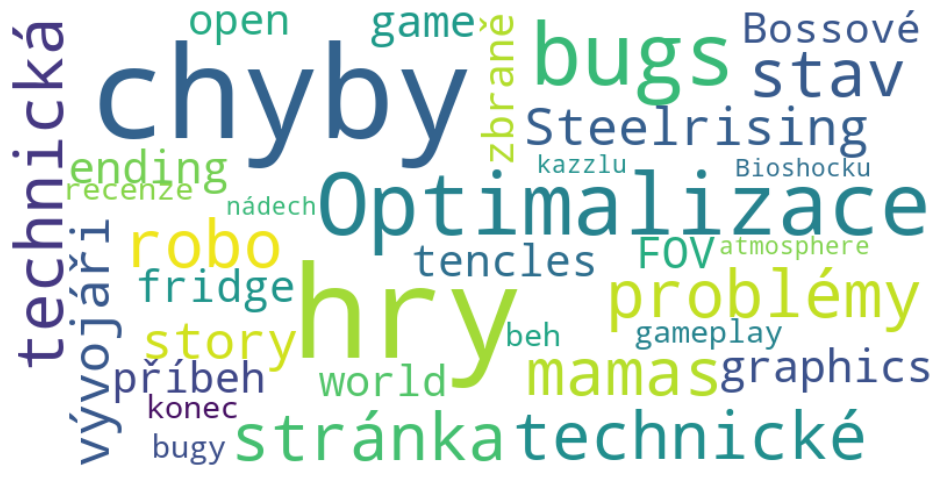

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_730_czech.txt.output.jsonl
gameplay


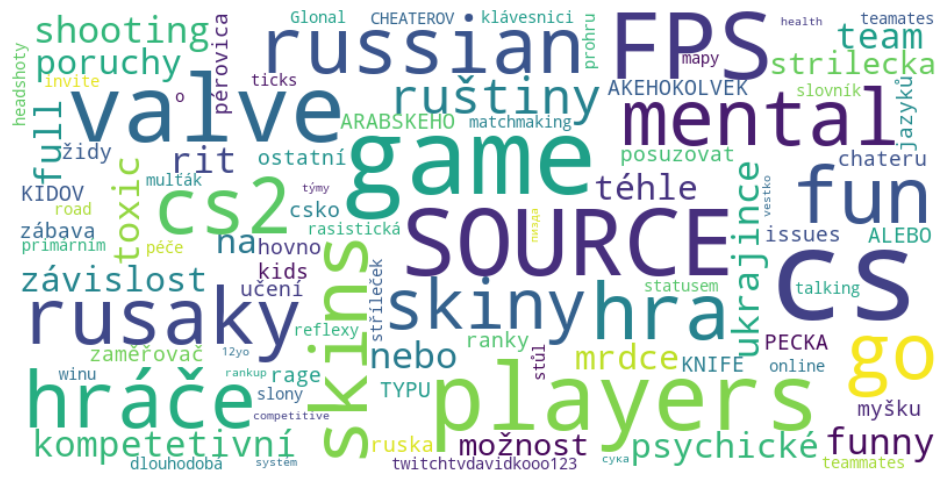

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

audio_visuals


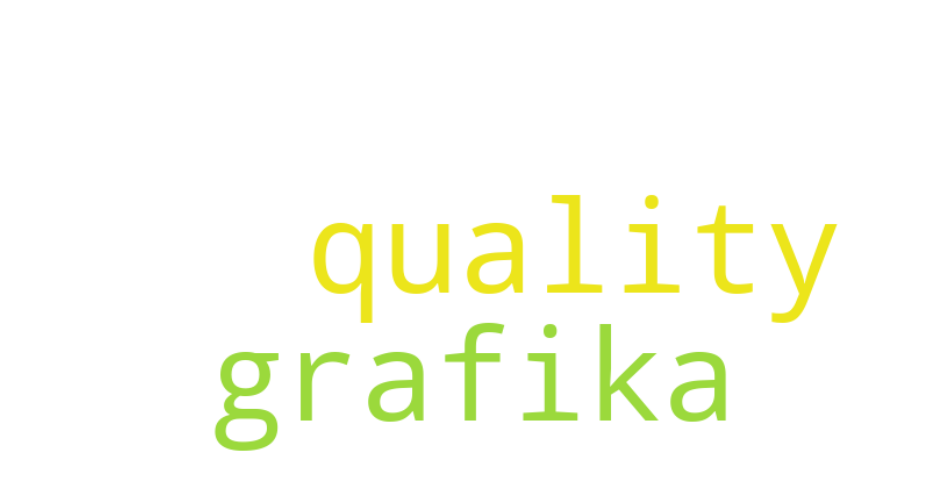

performance_bugs


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

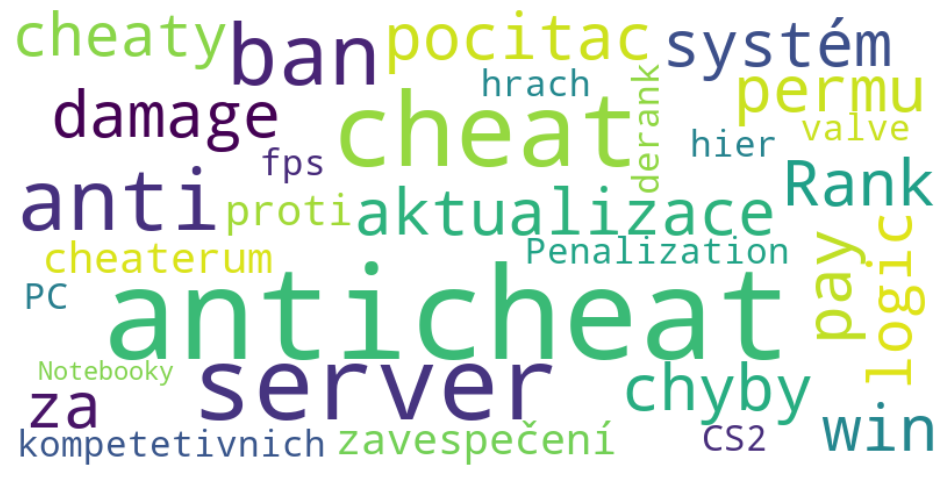

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

community


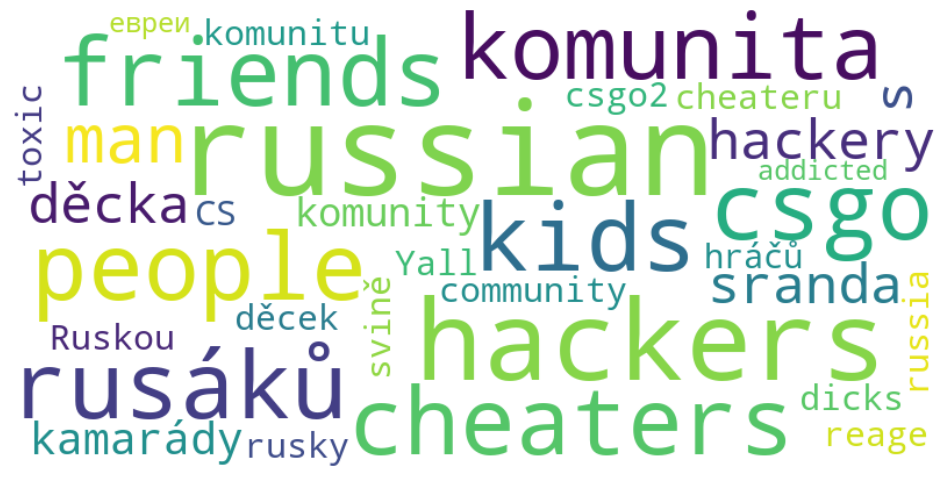

overall


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

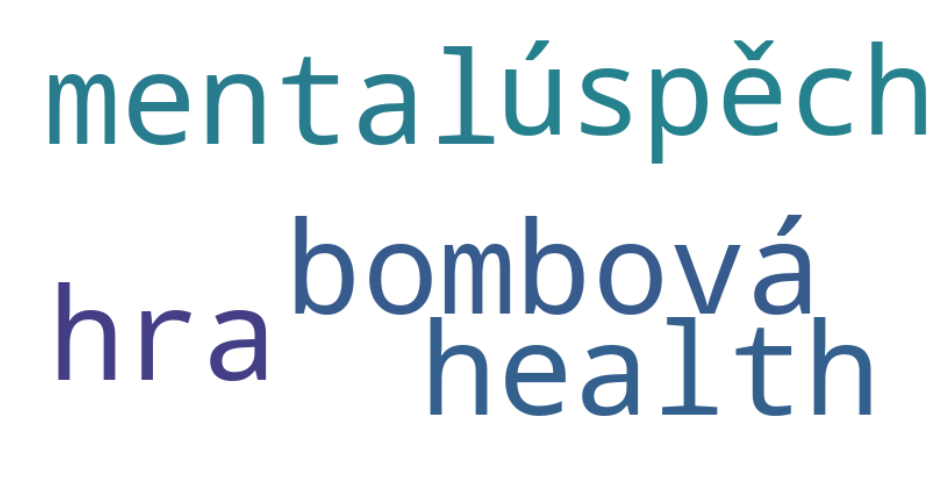

D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

NULL


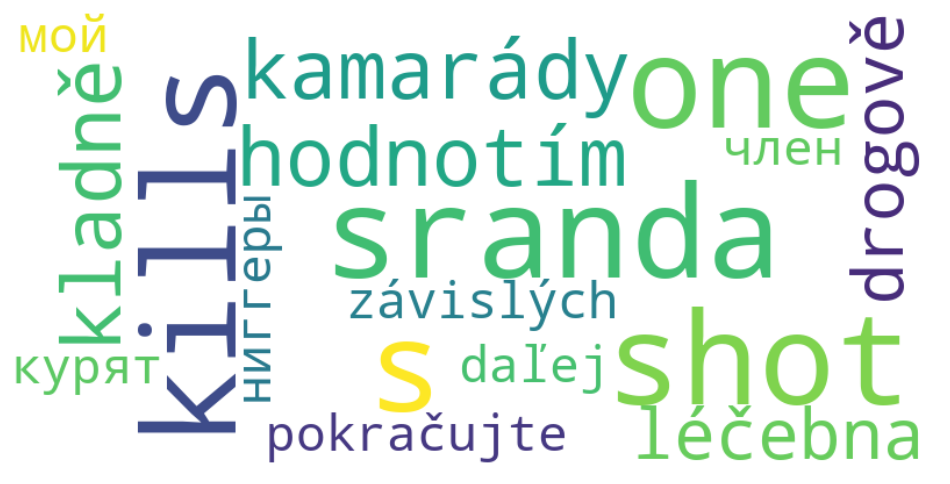

neutral


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


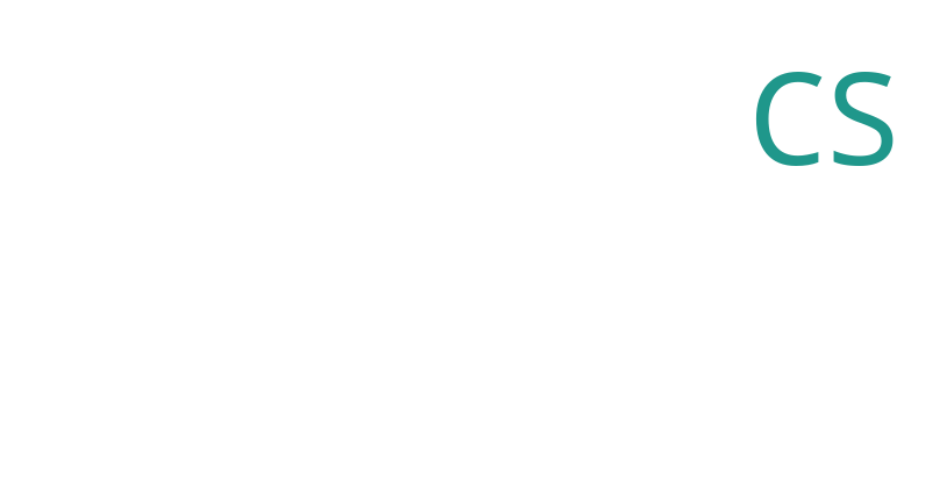

positive


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

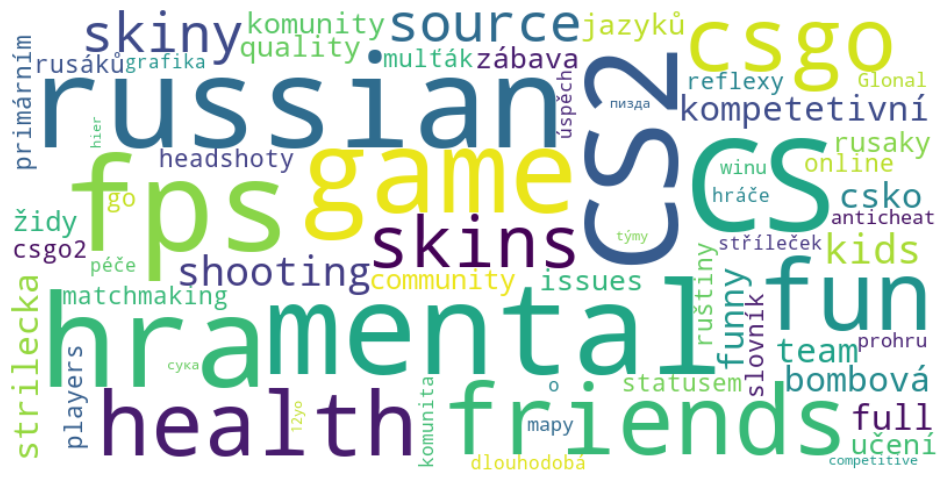

negative


D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\PythonProjects\SentimentAnalysis\venv3.8\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarnin

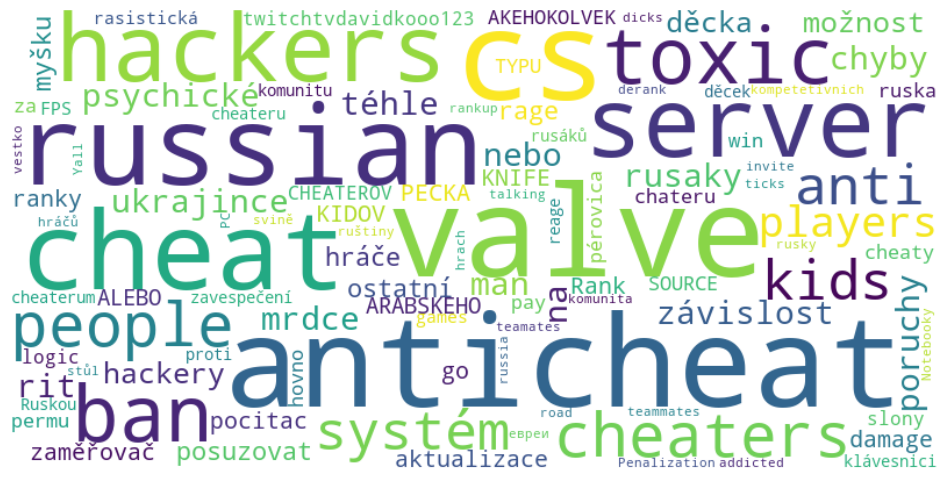

checkpoints\multitask\joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\checkpoint-1242\eval\FPS_generated_data.main_categories.joint-acos.eval.jsonl


KeyError: 'summary'

In [11]:
# wordcloud from the most frequent terms per category
from wordcloud import WordCloud

for file, d in data.items():
    print(file)
    summary = d['summary']
    for category, terms in summary['terms'].items():
        if category == 'other':
            continue
        if len(terms) == 0:
            continue
        print(category)
        wordcloud = WordCloud(width=800, height=400, max_font_size=110, background_color="white").generate(
            ' '.join(terms))
        plt.figure(figsize=(12, 10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

../../../../integrated_datasets/acos_datasets\1335.GamesACOS\train.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1335.GamesACOS\test.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1336.Games\train.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1336.Games\test.main_categories.jsonl
827
143
456
104


2023-04-22 18:31:13,963 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:31:13,974 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:31:13,974 - DEBUG: Writing TrueType font.


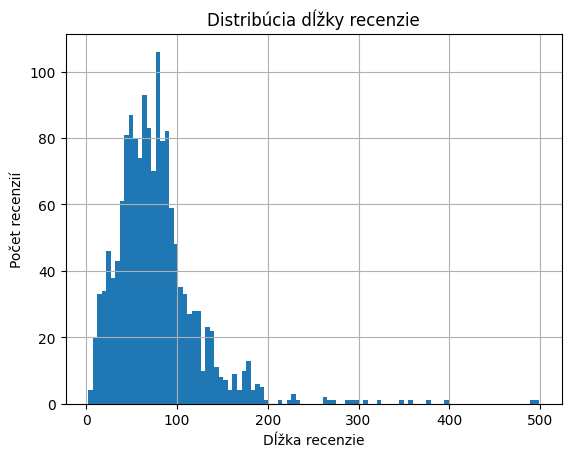

2023-04-22 18:31:14,124 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:31:14,138 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:31:14,139 - DEBUG: Writing TrueType font.
2023-04-22 18:31:14,219 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:31:14,235 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:31:14,235 - DEBUG: Writing TrueType font.


1335.GamesAcos.train
audio_visuals
negative: 42 (22.22%)
neutral: 11 (5.82%)
positive: 136 (71.96%)
total: 189 (10.70%)

community
negative: 26 (60.47%)
neutral: 3 (6.98%)
positive: 14 (32.56%)
total: 43 (2.43%)

gameplay
negative: 426 (47.23%)
neutral: 50 (5.54%)
positive: 426 (47.23%)
total: 902 (51.05%)

overall
negative: 118 (53.39%)
neutral: 20 (9.05%)
positive: 83 (37.56%)
total: 221 (12.51%)

performance_bugs
negative: 211 (56.12%)
neutral: 15 (3.99%)
positive: 150 (39.89%)
total: 376 (21.28%)

price
negative: 29 (80.56%)
neutral: 0 (0.00%)
positive: 7 (19.44%)
total: 36 (2.04%)

1335.GamesAcos.test
audio_visuals
negative: 7 (21.21%)
neutral: 1 (3.03%)
positive: 25 (75.76%)
total: 33 (12.74%)

community
negative: 2 (50.00%)
neutral: 1 (25.00%)
positive: 1 (25.00%)
total: 4 (1.54%)

gameplay
negative: 74 (56.06%)
neutral: 9 (6.82%)
positive: 49 (37.12%)
total: 132 (50.97%)

overall
negative: 20 (47.62%)
neutral: 2 (4.76%)
positive: 20 (47.62%)
total: 42 (16.22%)

performance_bugs

2023-04-22 18:31:14,308 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:31:14,322 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:31:14,322 - DEBUG: Writing TrueType font.
2023-04-22 18:31:14,401 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:31:14,415 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:31:14,416 - DEBUG: Writing TrueType font.


1336.GamesACS.test
audio_visuals
negative: 3 (17.65%)
neutral: 2 (11.76%)
positive: 12 (70.59%)
total: 17 (9.66%)

community
negative: 10 (66.67%)
neutral: 0 (0.00%)
positive: 5 (33.33%)
total: 15 (8.52%)

gameplay
negative: 31 (34.44%)
neutral: 23 (25.56%)
positive: 36 (40.00%)
total: 90 (51.14%)

overall
negative: 7 (26.92%)
neutral: 1 (3.85%)
positive: 18 (69.23%)
total: 26 (14.77%)

performance_bugs
negative: 10 (41.67%)
neutral: 2 (8.33%)
positive: 12 (50.00%)
total: 24 (13.64%)

price
negative: 1 (25.00%)
neutral: 0 (0.00%)
positive: 3 (75.00%)
total: 4 (2.27%)



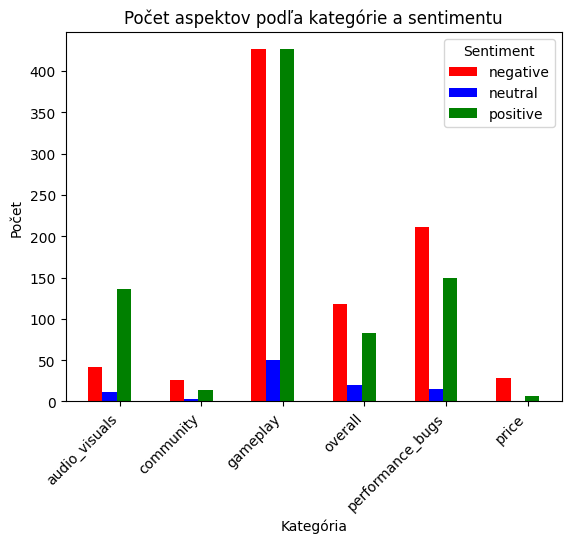

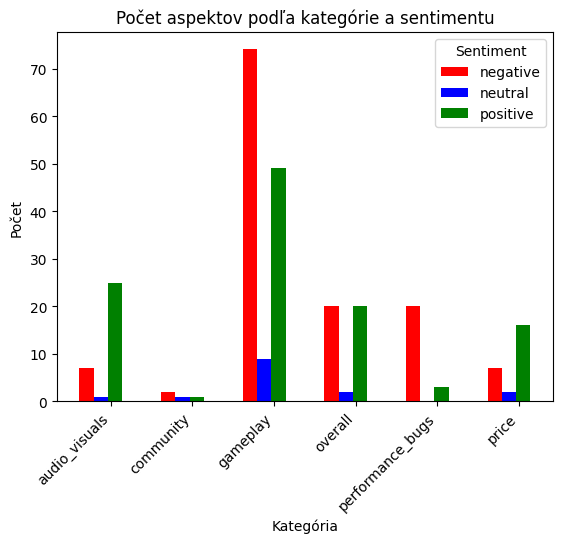

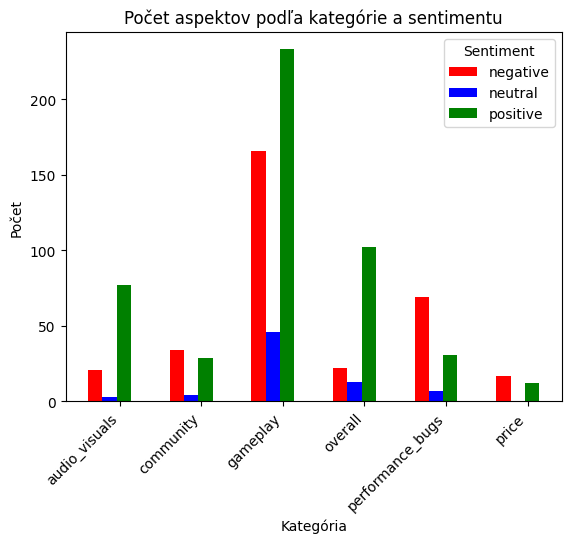

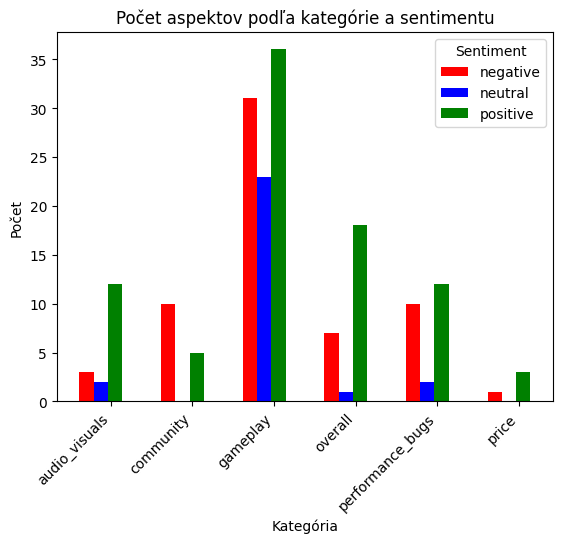

In [59]:
# only acos dataset
dataset = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1335.GamesAcos')
train = data_utils.read_json(dataset, data_type="train.main_categories")
test = data_utils.read_json(dataset, data_type="test.main_categories")

dataset2 = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1336.Games')
train2 = data_utils.read_json(dataset2, data_type="train.main_categories")
test2 = data_utils.read_json(dataset2, data_type="test.main_categories")

print(len(train))
print(len(test))
print(len(train2))
print(len(test2))

# create df with text of every train, test, train2 and test2

df_train = pd.DataFrame(train, columns=['text'])
df_test = pd.DataFrame(test, columns=['text'])
df_train2 = pd.DataFrame(train2, columns=['text'])
df_test2 = pd.DataFrame(test2, columns=['text'])

df = pd.concat([df_train, df_test, df_train2, df_test2])
df['text_length'] = df['text'].apply(lambda x: len(x))

ax = df['text_length'].hist(bins=100)
fig = ax.get_figure()
ax.set_title('Distribúcia dĺžky recenzie')
ax.set_xlabel('Dĺžka recenzie')
ax.set_ylabel('Počet recenzií')
fig.savefig(f"distibution_of_length.pdf", bbox_inches='tight')
plt.show()


def visualize_aspects_stats(datasets, files):
    # to pandas dataframe for easier manipulation
    dfs = [pd.DataFrame([{**{'text': item['text']}, **label} for item in dataset for label in item['labels']]) for
           dataset in datasets]

    # group by text and counts for each category and polarity
    for df, file in zip(dfs, files):
        # Group the data by category and polarity, and count the number of occurrences
        grouped_data = df.groupby(['category', 'polarity']).size().reset_index(name='count')

        # Get unique categories and polarities
        # remove NULL or none
        grouped_data = grouped_data[grouped_data['category'] != 'NULL']
        grouped_data = grouped_data[grouped_data['category'] != 'none']

        categories = grouped_data['category'].unique()
        polarities = grouped_data['polarity'].unique()



        # Make sure there is data for every combination of category and polarity
        full_data = pd.DataFrame([(c, p, 0) for c in categories for p in polarities],
                                 columns=['category', 'polarity', 'count'])
        grouped_data = pd.merge(full_data, grouped_data, on=['category', 'polarity'], how='left').fillna(0)
        grouped_data['count'] = grouped_data['count_x'] + grouped_data['count_y']

        # print percentages of aspect counts per category and polarity and total aspects per category
        print(file)
        for category in categories:
            category_data = grouped_data[grouped_data['category'] == category]
            total = category_data['count'].sum()
            print(category)
            for polarity in polarities:
                polarity_data = category_data[category_data['polarity'] == polarity]
                count = polarity_data['count'].sum()
                print(f"{polarity}: {count:.0f} ({count / total * 100:.2f}%)")
            # print count of total aspects per category and as percentage of total aspects
            sum = grouped_data['count'].sum()
            print(f"total: {total:.0f} ({total / sum * 100:.2f}%)")
            print()

        bar_width = 0.35
        spacing = 1.0
        bar_positions = np.arange(len(categories)) * (1 + spacing)

        # Define the color mapping for polarities
        color_map = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

        fig, ax = plt.subplots()
        for index, polarity in enumerate(polarities):
            polarity_data = grouped_data[grouped_data['polarity'] == polarity]
            ax.bar(bar_positions + (index - len(polarities) / 2.5) * bar_width, polarity_data['count'], width=bar_width,
                   label=polarity, color=color_map.get(polarity, "orange"))

        ax.set_xticks(bar_positions + bar_width / 2)
        ax.set_xticklabels(categories, rotation=45, ha='right')
        ax.set_xlabel('Kategória')
        ax.set_ylabel('Počet')
        ax.set_title('Počet aspektov podľa kategórie a sentimentu')
        ax.legend(title='Sentiment', )
        fig.savefig(f"{file}.pdf", bbox_inches='tight')

    plt.show()


# Show the plot
visualize_aspects_stats([train, test, train2, test2],
                        ["1335.GamesAcos.train", "1335.GamesAcos.test", "1336.GamesACS.train", "1336.GamesACS.test"])


2023-04-22 18:06:46,629 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:06:46,643 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:06:46,643 - DEBUG: Writing TrueType font.
2023-04-22 18:06:46,720 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-22 18:06:46,734 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-22 18:06:46,735 - DEBUG: Writing TrueType font.


../../../../integrated_datasets/acos_datasets\1337.GamesCzechEng\train.jsonl
../../../../integrated_datasets/acos_datasets\1337.GamesCzechEng\test.jsonl
['audio_visuals' 'community' 'gameplay' 'overall' 'performance_bugs'
 'price']
audio_visuals
negative 7
neutral 1
positive 22

community
negative 2
neutral 1
positive 7

gameplay
negative 42
neutral 8
positive 60

overall
negative 3
neutral 0
positive 19

performance_bugs
negative 13
neutral 1
positive 9

price
negative 3
neutral 0
positive 3

['audio_visuals' 'community' 'gameplay' 'overall' 'performance_bugs'
 'price']
['audio_visuals' 'community' 'gameplay' 'other' 'overall'
 'performance_bugs' 'price']


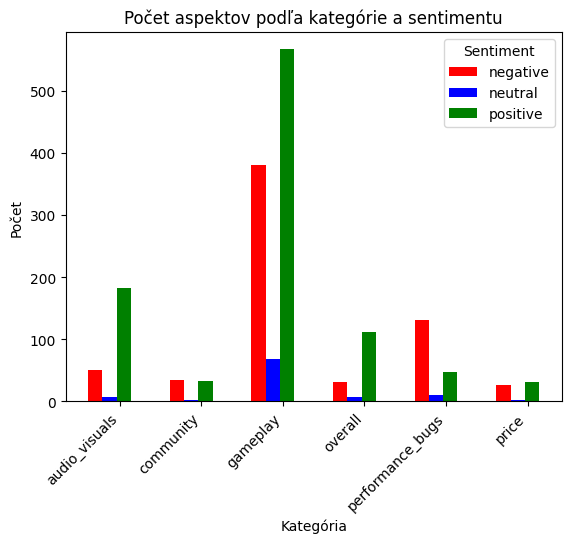

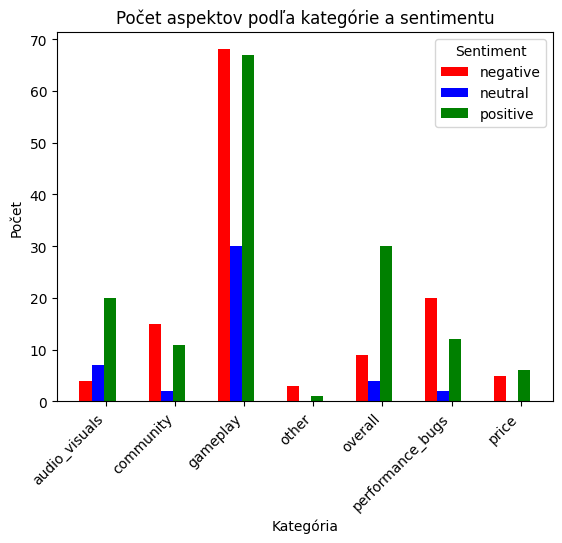

In [40]:
import random

# only acs dataset
dataset = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1337.Games')
train = data_utils.read_json(dataset, data_type="train")
test = data_utils.read_json(dataset, data_type="test")

#pick random sample of 100
train_rnd = random.sample(train, 100)
# print percentages of each category
df_rnd = pd.DataFrame([{**{'text': item['text']}, **label} for item in train_rnd for label in item['labels']])
grouped_data = df_rnd.groupby(['category', 'polarity']).size().reset_index(name='count')
grouped_data = grouped_data[grouped_data['category'] != 'NULL']
grouped_data = grouped_data[grouped_data['category'] != 'none']
categories = grouped_data['category'].unique()
polarities = grouped_data['polarity'].unique()
print(categories)
# print statictics
for category in categories:
    print(category)
    for polarity in polarities:
        print(polarity, len(df_rnd[(df_rnd['category'] == category) & (df_rnd['polarity'] == polarity)]))
    print('')

visualize_aspects_stats([train, test], ["1337.Games.train", "1337.Games.test"])
# Show the plot
plt.show()

['joint-acos-1333.Games_ACS-mt5_acos_on_all_data_logs.json', 'joint-acos-1333.Games_ACS-on_all_data_logs.json', 'joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data_logs.json', 'joint-acos-1335.GamesACOS-byt5-base-i2eg-2b_logs.json', 'joint-acos-1335.GamesACOS-byt5-small-after-ood_logs.json', 'joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model_logs.json', 'joint-acos-1335.GamesACOS-mt5-base-joint-acos-1335.GamesACOS_logs.json', 'joint-acos-1335.GamesACOS-mt5_acos_only_logs.json', 'joint-acos-1335.GamesACOS-on_acos_only_logs.json', 'joint-acos-506.Synthetic-byt5-base_logs.json', 'joint-acos-506.Synthetic-ood_data_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg-20e_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-on_all_data_logs.json']
joint-acos-1333.Games_ACS-mt5_acos_on_all_data_logs.json
train_l

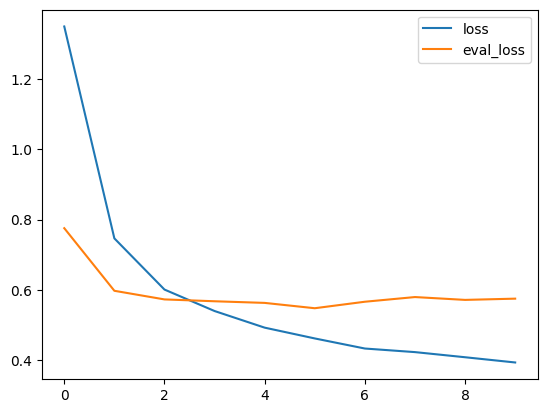

joint-acos-1335.GamesACOS-byt5-small-after-ood_logs.json
train_loss or eval_loss is empty
joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model_logs.json


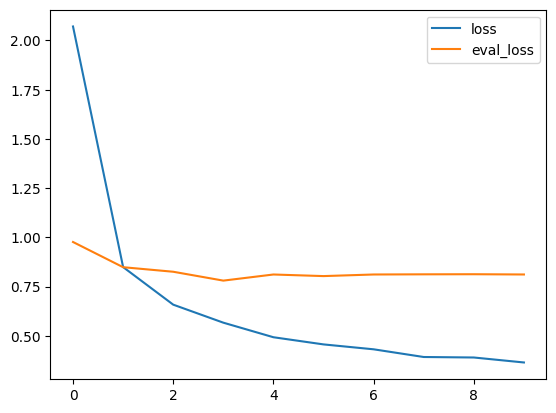

joint-acos-1335.GamesACOS-mt5-base-joint-acos-1335.GamesACOS_logs.json
train_loss and eval_loss have different length
joint-acos-1335.GamesACOS-mt5_acos_only_logs.json
train_loss and eval_loss have different length
joint-acos-1335.GamesACOS-on_acos_only_logs.json
train_loss and eval_loss have different length
joint-acos-506.Synthetic-byt5-base_logs.json
train_loss and eval_loss have different length
joint-acos-506.Synthetic-ood_data_logs.json


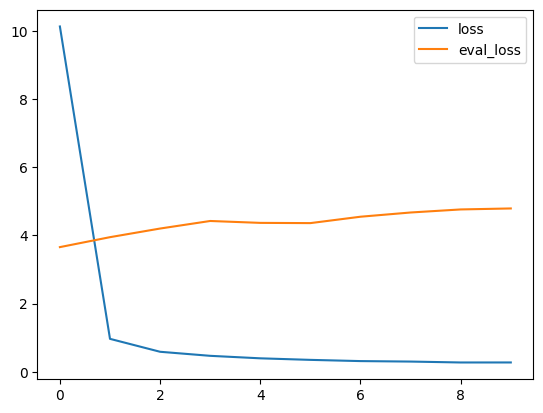

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg-20e_logs.json


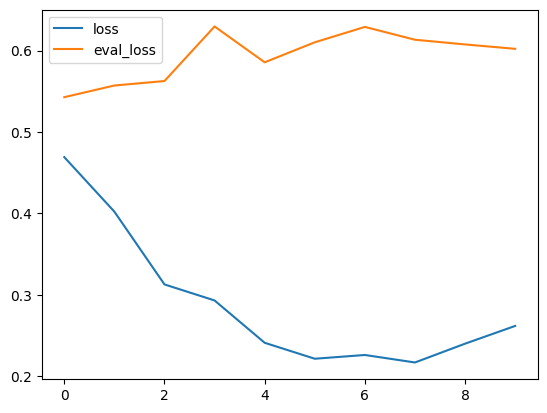

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg_logs.json


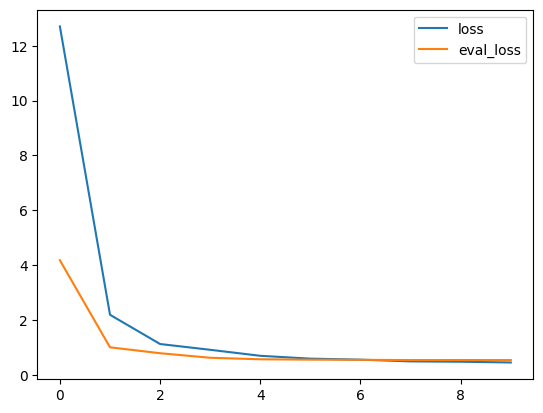

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base_logs.json
train_loss or eval_loss is empty
joint-aspect-category-sentiment-1333.Games_ACS-on_all_data_logs.json
train_loss and eval_loss have different length


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import findfile

# find log files from training
log_files = findfile.find_cwd_files('logs')
print(log_files)

# plot each train_loss and eval_loss for each log file of json string
# log file is a json file {train_loss:[1.0,0.9...], eval_loss:[1.0,0.9...]}
# match the number of train_loss and eval_loss and plot them

for log_file in log_files:
    print(log_file)
    with open(log_file, 'r', encoding='utf8') as f:
        data = json.load(f)
        train_loss = data['train_loss']
        eval_loss = data['eval_loss']
        if len(train_loss) == 0 or len(eval_loss) == 0:
            print("train_loss or eval_loss is empty")
            continue
        if len(train_loss) != len(eval_loss):
            print("train_loss and eval_loss have different length")
            # duplicate missing values in eval_loss
            eval_loss = np.repeat(eval_loss, len(train_loss) // len(eval_loss))
            continue

        plt.plot(np.arange(0, len(train_loss)), train_loss, label='loss')
        plt.plot(np.arange(0, len(train_loss)), eval_loss, label='eval_loss')
        plt.legend()
        plt.show()




